In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

The images available here ranges from 0 to 255 pixels. Since we are about to train neural network it is important for us to scale down the images between 0 and 1
We scale down neural network inputs for the following reasons:
1. **Faster Convergence**: Gradient Descent optimizes the model by iteratively adjusting parameters based on gradients. If features are not scaled, larger values could lead to large gradient steps, causing the algorithm to overshoot the minimum, while smaller values may slow down convergence. Scaling ensures that all features contribute equally to the optimization process, speeding it up.
2. **Numerical Stability**: Neural networks involve a lot of numerical computations. If input values are very large, it may result in numerical instability, like overflow or underflow, especially with certain activation functions. Scaling keeps the values within a manageable range.
3. **Uniform Feature Influence**: Pixel intensities range from 0 to 255. By scaling them to the 0–1 range, you ensure that no particular feature (like a brighter pixel) disproportionately influences the model's weights, allowing the network to focus on relative patterns rather than absolute magnitudes.


In [5]:
#We will start by creating a validation set for our dataset
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
 class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

# Building a neural network


A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation = "relu"))
model.add(keras.layers.Dense(100,activation = "relu"))
model.add(keras.layers.Dense(10,activation = "softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Going through the code line by line:
1. The first line creates a Sqauential model. It is the simplest kind of model for keras neural network that are composed of a single stack of layers connected sequentially.

2. Next we build our first layer and add it to our model. It is a flatten layer whose role is to convert each input image into a 1D array: It recieves input X and computes X.reshape(-1,1)

3. Next we add a dense layer of 300 neurons. It will use relu Activation function. Each dense layer manages its own weight matrix, containing all the connected weights between the neuron and their inputs. It also has a vector bias term(one per neuron).

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Dense layers have a lor of parameters. The first dense layer has 784*300 connected weight + 300 additional bias weight

In [10]:
model.layers #getting model's list of layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

All the parameters of a layer can be accessedusing get_weights() ans set_weights() methods

In [22]:
weights, biases = model.layers[3].get_weights()

In [23]:
weights

array([[-1.99985340e-01, -8.92712027e-02, -1.26822710e-01,
         2.01785564e-01,  1.91979915e-01,  6.25739098e-02,
        -2.02614829e-01, -5.66946715e-02,  1.74101800e-01,
        -1.35119975e-01],
       [ 2.04968750e-02, -2.08225965e-01, -1.28057912e-01,
         1.81017578e-01, -1.37022376e-01, -1.71493500e-01,
         7.36117363e-04, -5.30291349e-02, -2.16426119e-01,
         1.32178426e-01],
       [-9.68100727e-02,  2.06224322e-02,  1.34900570e-01,
         1.73782110e-01, -1.07666790e-01,  1.90217882e-01,
         1.46290332e-01,  1.43327087e-01,  7.45889843e-02,
         2.05336362e-01],
       [ 8.19788575e-02,  1.89909577e-01, -1.73492178e-01,
        -2.02664286e-01, -1.20577686e-01, -1.25862852e-01,
        -6.61608279e-02, -7.88139105e-02, -2.10167348e-01,
        -8.44805092e-02],
       [ 1.33482963e-01, -2.31793821e-02,  1.48396373e-01,
         1.14170790e-01,  1.80517703e-01,  2.05126733e-01,
        -1.99554026e-01, -1.63416475e-01, -2.08061337e-02,
        -6.

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

If you want to use another initiliazition method, you can set kernal_initializer(weights initializer) or bias_initializer

---
The shape of weighgt matrix depends on the number of inputs. That is why it is recommended to specify input_shape when creating the first layer of sequential model.
If you do not specify the input shape, Keras will simply weight until it knows the input shape before it builds the model. This will happen when you feed the data or when you call its build() method

---

After the model is created you must call its compile() function to specify the loss function and the optimizer to use.

In [25]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd",metrics = ["accuracy"])

Breakdown of each part:
1. **Loss Function (`loss = "sparse_categorical_crossentropy"`):**  
   The loss function is essentially a measure of how far off your model's predictions are from the actual labels. In this case, `"sparse_categorical_crossentropy"` is used, which is particularly suited for multi-class classification problems where the target labels are provided as integers (for example, 0, 1, 2, ...). Unlike the usual categorical crossentropy (which requires one-hot encoded labels), the "sparse" version saves memory and simplifies data preparation because it deals directly with integer labels.

2. **Optimizer (`optimizer = "sgd"`):**  
   The optimizer is the algorithm that adjusts the weights of your model in order to minimize the loss function. Here, `"sgd"` stands for Stochastic Gradient Descent. It works by iteratively updating the model's parameters in the direction that minimizes the loss based on the gradient computed from a subset (or batch) of the training data.

3. **Metrics (`metrics = ["accuracy"]`):**  
   Metrics are used to monitor the performance of your model during training and evaluation. By specifying `"accuracy"`, you're instructing the model to track the proportion of predictions that match the true labels. Accuracy is one of the most intuitive and common metrics for classification tasks.


# Training and evaluating the model

In [28]:
history = model.fit(X_train,y_train,epochs = 30,validation_data = (X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6870 - loss: 1.0102 - val_accuracy: 0.8366 - val_loss: 0.4959
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8268 - loss: 0.5002 - val_accuracy: 0.8450 - val_loss: 0.4504
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8453 - loss: 0.4476 - val_accuracy: 0.8540 - val_loss: 0.4334
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8531 - loss: 0.4223 - val_accuracy: 0.8504 - val_loss: 0.4373
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8583 - loss: 0.4021 - val_accuracy: 0.8686 - val_loss: 0.3814
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8652 - loss: 0.3823 - val_accuracy: 0.8730 - val_loss: 0.3684
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8691 - loss: 0.3686 - val_accuracy: 0.8718 - val_loss: 0.3653
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8766 - loss: 0.351

---
If the class weight was skewed, with some class being overrepresented and underrepresentd, It would be useful to set class_weight argument when calling the fit function, which would give larger weight to underrepresented classes and lower weight to overrepresented classes

---

In [30]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [32]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [33]:
history.history

{'accuracy': [0.764018177986145,
  0.8297091126441956,
  0.8456727266311646,
  0.8547090888023376,
  0.8615636229515076,
  0.8660727143287659,
  0.8710545301437378,
  0.875109076499939,
  0.8770363926887512,
  0.8817636370658875,
  0.883545458316803,
  0.8861818313598633,
  0.8888727426528931,
  0.8904363512992859,
  0.8939090967178345,
  0.8954363465309143,
  0.897599995136261,
  0.8998545408248901,
  0.9019272923469543,
  0.9036909341812134,
  0.9050545692443848,
  0.906000018119812,
  0.9082000255584717,
  0.9100363850593567,
  0.9110363721847534,
  0.9136000275611877,
  0.9139817953109741,
  0.9168000221252441,
  0.9175999760627747,
  0.9191272854804993],
 'loss': [0.7242121696472168,
  0.48869866132736206,
  0.4418764114379883,
  0.4153938889503479,
  0.39426493644714355,
  0.3794727325439453,
  0.3644670844078064,
  0.3527449667453766,
  0.3440508544445038,
  0.3332741856575012,
  0.3263852596282959,
  0.3174728751182556,
  0.31029433012008667,
  0.3035198748111725,
  0.296754300

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

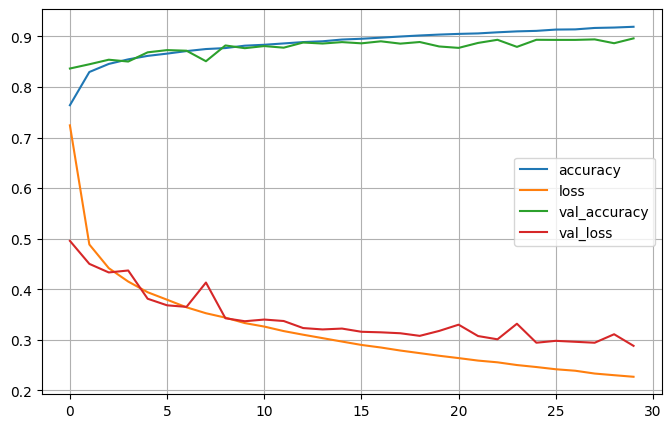

In [37]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)

In [41]:
model.evaluate(X_test/255,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8858 - loss: 0.3292


[0.3259923458099365, 0.8845000267028809]